In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

from ComBat_MLE import ComBat_MLE

In [2]:
def add_scanner_effects(data):
    '''
    Add random addictive and multiplicative scanner effects on data 
    '''
    n_samples, n_features=data.shape
    
    #generate random scanner effects
    addictive_scanner_effects=np.random.randint(0,10,size=n_features)
    addictive_scanner_effects=np.array(addictive_scanner_effects)[np.newaxis,:]
    multiplicative_scanner_effects=np.random.randint(10,30,size=n_features)/20
    multiplicative_scanner_effects=np.array(multiplicative_scanner_effects)[np.newaxis,:]

    #add addictive scanner effects
    data_with_scanner_effects=data+ addictive_scanner_effects

    #add multiplier scanner effects
    mean_data=np.mean(data_with_scanner_effects,axis=0)[np.newaxis,:]
    e=np.array([1]* n_samples)[:,np.newaxis]
    multiplicative_matrix=np.dot(e,multiplicative_scanner_effects)
    data_with_scanner_effects=mean_data+np.multiply(data_with_scanner_effects-mean_data, multiplicative_matrix)

    return data_with_scanner_effects
        
def get_simulated_data(n_settings):
    '''
    Generate simulated data
    
    '''
   
    count=0
    for i in range(n_settings):
        count+=1
        
        #generate data from same distribution
        center=[[1,1,32,110,0.02],[-1,-8,14,120,0.1],[12,-1,52,125,-0.01]]
        cluster_std=[0.4,0.7,0.5]
        data_i,labels_i=make_blobs(n_samples=100,centers=center,cluster_std=cluster_std)

        setting_labels_i=[i]*data_i.shape[0]

        
        #add scanner effects
        data_i_with_scanner_effects=add_scanner_effects(data_i)
        
        #concatanate the simulated datas from all settings
        if count==1:
            clear_data=data_i
            true_class_labels=labels_i
            setting_labels=setting_labels_i
            data_with_scanner_effects=data_i_with_scanner_effects
            
        else:
            clear_data=np.concatenate([clear_data,data_i], axis=0)
            true_class_labels=np.concatenate([true_class_labels,labels_i], axis=0)
            setting_labels=np.concatenate([setting_labels,setting_labels_i], axis=0)
            data_with_scanner_effects=np.concatenate([data_with_scanner_effects,data_i_with_scanner_effects], axis=0)

    return data_with_scanner_effects, setting_labels, true_class_labels, clear_data


### Main: test the models

Begin fitting the model...
There are 5 scanner settings!
scanner setting s=0, data shape=(100, 5)
scanner setting s=1, data shape=(100, 5)
scanner setting s=2, data shape=(100, 5)
scanner setting s=3, data shape=(100, 5)
scanner setting s=4, data shape=(100, 5)
Finish fitting the model...
Begin harmonizing data...
Finish harmonizing data...


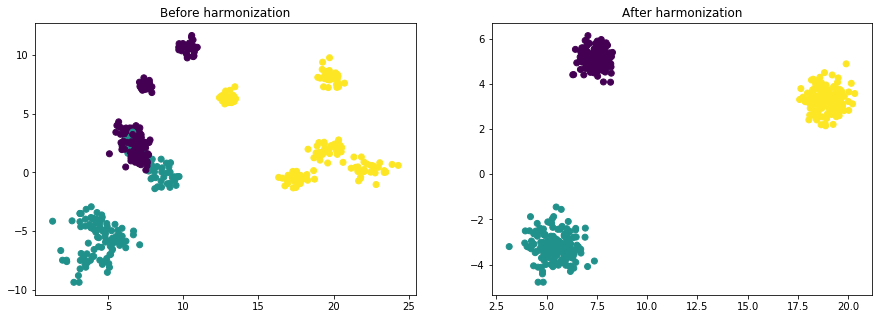

In [3]:
#-------generate example data---------------
data_with_scanner_effects, setting_labels, class_labels, clear_data=get_simulated_data(n_settings=5)

   
#-------remove scanner effects---------------
myModel=ComBat_MLE()
harmonized_data=myModel.harmonize_data(data_with_scanner_effects,setting_labels)


#-----show the harmonization results-----------
plt.figure(figsize=(15,5))

subfig1=plt.subplot(121)
subfig1.set_title("Before harmonization")
plt.scatter(data_with_scanner_effects[:, 0], data_with_scanner_effects[:, 1], c=class_labels)

subfig2=plt.subplot(122)
subfig2.set_title("After harmonization")
plt.scatter(harmonized_data[:,0], harmonized_data[:,1], c= class_labels)

plt.show()